# **Samples of Functions Drawn from Gaussian Processes for Different Kernels :**
$$f(\mathbf{x}) = \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x},\mathbf{x^{'}}))$$
* We specify a set of input points $x = \{x_1,...,x_N\}$ and an $N \times N$ covariance matrix $K$.
* We draw a vector $(y_1,...,y_N)$ from the gaussian defined by $\mathbf{y} = N(0, K)$.

In [1]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
from modules.GP.ExactGP_regression import *
from modules.GP.kernels import *
from modules.GP.train_GP_regression import *

%load_ext autoreload
%autoreload 2

In [2]:
# ficticious data
train_x = torch.linspace(0, 1, 100)
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)
# sampling points
sampling_points = torch.linspace(-10, 10, 1000)


## **Testing With Different Kernels :**

In [3]:
# initialize likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
# How many functions to sample
T = 3

In [4]:
kernels = {"Linear Kernel" : gpytorch.kernels.LinearKernel(), "Gaussian Kernel 2":GaussianKernel(sigma_squared = 2), "Gaussian Kernel 50":GaussianKernel(sigma_squared = 50)}

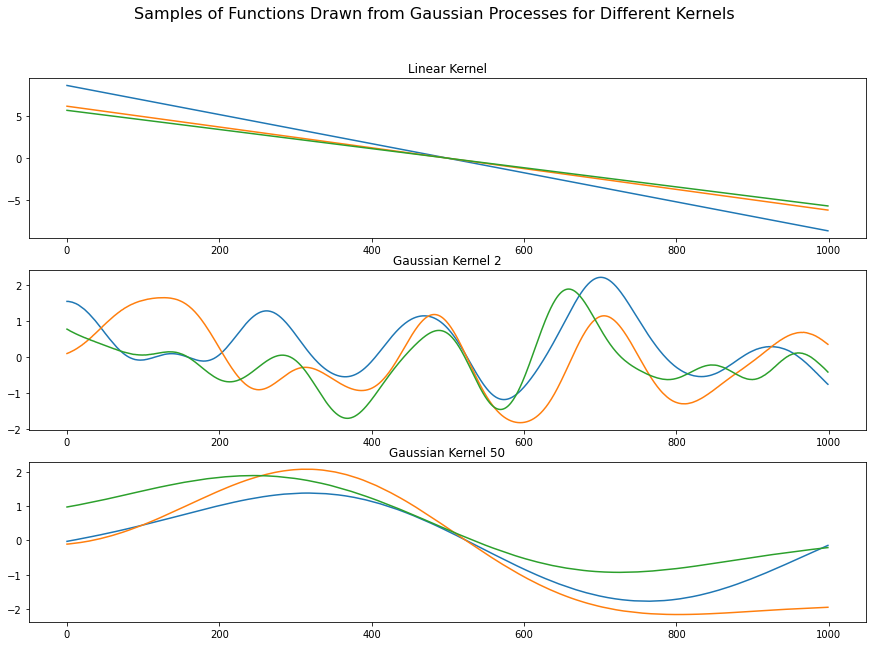

In [5]:
plt.figure(figsize=(len(kernels)*5, 10))
plt.suptitle("Samples of Functions Drawn from Gaussian Processes for Different Kernels", fontsize=16)      
for i,kernel_name in enumerate(kernels):
    ax = plt.subplot(len(kernels), 1, i+1)
    ax.set_title(kernel_name)
    model = ExactGP_Regression(train_x, train_y, likelihood, kernel = kernels[kernel_name])
    # Set into posterior mode
    model.eval()
    likelihood.eval()
    # sample functions
    preds = model(sampling_points)
    for _ in range(T):
        y = preds.sample()
        plt.plot(y)

## **Example of Training GP :**

In [6]:
test_model = ExactGP_Regression(train_x, train_y, likelihood, kernel = gpytorch.kernels.RBFKernel())
train(test_model, likelihood, 50)

Iter 1/50 - Loss: 0.950   lengthscale: 0.644   noise: 0.644
Iter 2/50 - Loss: 0.919   lengthscale: 0.598   noise: 0.598
Iter 3/50 - Loss: 0.886   lengthscale: 0.555   noise: 0.554
Iter 4/50 - Loss: 0.849   lengthscale: 0.514   noise: 0.513
Iter 5/50 - Loss: 0.807   lengthscale: 0.476   noise: 0.474
Iter 6/50 - Loss: 0.760   lengthscale: 0.439   noise: 0.437
Iter 7/50 - Loss: 0.709   lengthscale: 0.405   noise: 0.402
Iter 8/50 - Loss: 0.657   lengthscale: 0.372   noise: 0.369
Iter 9/50 - Loss: 0.607   lengthscale: 0.342   noise: 0.339
Iter 10/50 - Loss: 0.562   lengthscale: 0.315   noise: 0.310
Iter 11/50 - Loss: 0.521   lengthscale: 0.292   noise: 0.284
Iter 12/50 - Loss: 0.485   lengthscale: 0.272   noise: 0.259
Iter 13/50 - Loss: 0.451   lengthscale: 0.255   noise: 0.237
Iter 14/50 - Loss: 0.418   lengthscale: 0.242   noise: 0.216
Iter 15/50 - Loss: 0.387   lengthscale: 0.232   noise: 0.196
Iter 16/50 - Loss: 0.356   lengthscale: 0.224   noise: 0.179
Iter 17/50 - Loss: 0.326   length

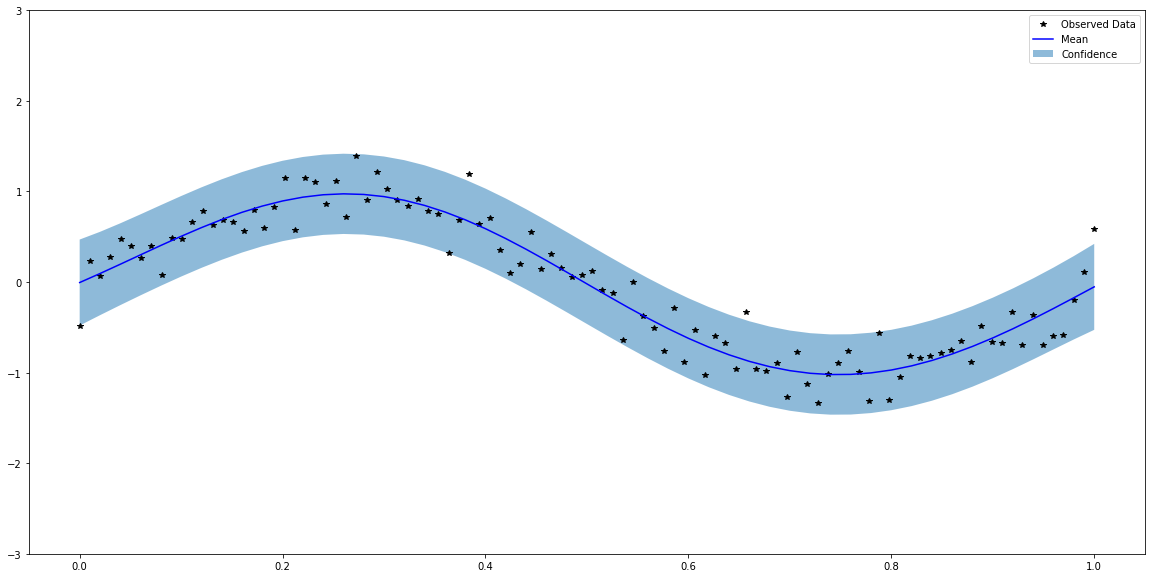

In [7]:
test_x = torch.linspace(0, 1, 51)
observed_pred = predict(test_model,likelihood, test_x)
plot(observed_pred,  train_x, train_y,test_x)